In [1]:
# Mount Google drive so dataset can be accessed
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install contractions

In [3]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import nltk           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import contractions


from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
label = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP/Tweets.csv')

In [5]:
label.shape

(14640, 15)

In [6]:
label.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np 
import pandas as pd 


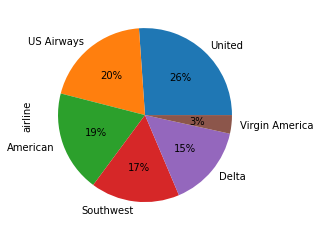

In [8]:
#EDA
label.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

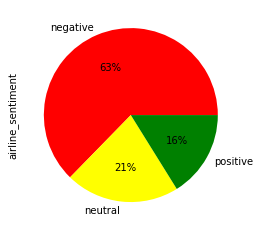

In [9]:
#looking at the sentiments distribution
label.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [10]:
#majority of all the tweets are negative (63%), with neutral tweets (21%), and lastly the positive tweets (16%)

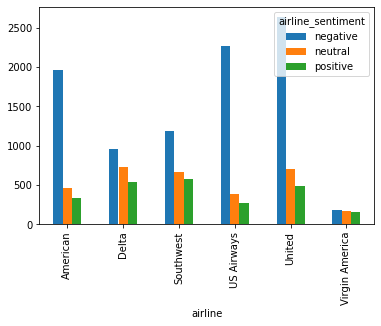

In [11]:
#checking the sentiment per airline
airline_sentiment = label.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

In [12]:
label.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [13]:
#dropping columns
df1 = label[['tweet_id', 'text', 'airline_sentiment']]
df1.head(5)

,tweet_id,text,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative


In [14]:
df1.shape

(14640, 3)

In [15]:
#text preprocessing

In [16]:
# Removal of the html link using Regular Expression.
for i, row in df1.iterrows():
    clean_text = re.sub(r"http\S+", "", df1.at[i, 'text'])
    df1.at[i,'text'] = clean_text
df1.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral
1,570301130888122368,@VirginAmerica plus you've added commercials t...,positive
2,570301083672813571,@VirginAmerica I didn't today... Must mean I n...,neutral
3,570301031407624196,@VirginAmerica it's really aggressive to blast...,negative
4,570300817074462722,@VirginAmerica and it's a really big bad thing...,negative


In [17]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in df1.iterrows():
    text = df1.at[i, 'text']
    clean_text = replace_contractions(text)
    df1.at[i,'text'] = clean_text
df1.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,@VirginAmerica What @dhepburn said.,neutral
1,570301130888122368,@VirginAmerica plus you have added commercials...,positive
2,570301083672813571,@VirginAmerica I did not today... Must mean I ...,neutral
3,570301031407624196,@VirginAmerica it is really aggressive to blas...,negative
4,570300817074462722,@VirginAmerica and it is a really big bad thin...,negative


In [18]:
# Tokenize the words of whole dataframe.
for i, row in df1.iterrows():
    text = df1.at[i, 'text']
    words = nltk.word_tokenize(text)
    df1.at[i,'text'] = words
df1.head()

,tweet_id,text,airline_sentiment
0,570306133677760513,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,570301130888122368,"[@, VirginAmerica, plus, you, have, added, com...",positive
2,570301083672813571,"[@, VirginAmerica, I, did, not, today, ..., Mu...",neutral
3,570301031407624196,"[@, VirginAmerica, it, is, really, aggressive,...",negative
4,570300817074462722,"[@, VirginAmerica, and, it, is, a, really, big...",negative


In [19]:
features = df1.iloc[:, 1].values
labels = df1.iloc[:, 2].values
# creating features and label with the text and airline sentiment values only for data preprocessing

In [20]:
df4 = []

In [21]:

for sentence in range(0, len(features)):
    # Remove all the special characters
    df3 = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    df3= re.sub(r'\s+[a-zA-Z]\s+', ' ', df3)

    # Remove single characters from the start
    df3 = re.sub(r'\^[a-zA-Z]\s+', ' ', df3) 

    # Substituting multiple spaces with single space
    df3 = re.sub(r'\s+', ' ', df3, flags=re.I)

    # Removing prefixed 'b'
    df3 = re.sub(r'^b\s+', '', df3)

    # Converting to Lowercase
    df3 = df3.lower()

    df4.append(df3)

In [22]:
# save the stopwords in a list named stopwords.
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords)
df4 = vectorizer.fit_transform(df4).toarray()

In [28]:
#dividing into training and data sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df4, labels, test_size=0.2, random_state=0)

In [29]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [30]:
predictions = text_classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1712  117   41]
 [ 324  247   43]
 [ 141   61  242]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.58      0.40      0.48       614
    positive       0.74      0.55      0.63       444

    accuracy                           0.75      2928
   macro avg       0.70      0.62      0.65      2928
weighted avg       0.74      0.75      0.74      2928

0.7517076502732241


In [ ]:
# a 75% accuracy is achieved in predicting the sentiments of US airline tweets with the text from twitter. I would further apply KNN, or lgistic regression for improved results